# Exploring Dandiset 001366: Surface Vessel Diameter and Pulsatility Quantification in Mice

**AI-generated notebook — please review all code/results critically.**

This notebook helps researchers get started exploring [Dandiset 001366](https://dandiarchive.org/dandiset/001366/0.250324.1603), titled "Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification." The dataset contains movies of pial vessels from mice, useful for reanalysis of vessel diameter and pulsatility using imaging and quantitative approaches.

## Overview

This Dandiset provides 16-bit grayscale time series images (movies) of pial vessels in wild-type mice, intended for the quantitative analysis of surface vessel diameter and pulsatility. The dataset includes:

- Imaging data stored in NWB files, compliant with the Neurodata Without Borders (NWB) standard
- Data acquired at 54.47 Hz
- Documentation of subject information (strain, age, sex, etc.) and session metadata

**Full dataset description and citation:**  
[DANDI:001366/0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603)

**Keywords:** vessel diameter, vessel pulsation, image analysis, full width at half maximum, radon transform

## What this notebook covers

- Required packages and loading NWB files directly from the DANDI Archive via remote streaming.
- Listing and getting basic metadata about dataset files and experiment sessions.
- Extracting and visualizing movie time series data of vessel images.
- Understanding dataset and file structure for further reanalysis.

**Packages used:**  
- `dandi.dandiapi` (accessing the DANDI Archive)
- `remfile` (streaming remote files)
- `h5py` (handling HDF5/NWB data)
- `pynwb` (loading and reading NWB content)
- Standard scientific Python plotting: `numpy`, `matplotlib`

## Required packages

This notebook assumes the following Python packages are **already installed**:

- `dandi`
- `remfile`
- `h5py`
- `pynwb`
- `numpy`
- `matplotlib`

Please make sure these are installed in your environment before proceeding.

## 1. Connect to the DANDI Archive and Explore Asset Listing

In this section, we'll use the DANDI API to explore the available assets in the Dandiset. This helps understand what data files are available and their structure.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI Archive and the Dandiset (version 0.250324.1603)
dandiset_id = "001366"
dandiset_version = "0.250324.1603"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List available files (assets) in the dandiset
print("Files in Dandiset 001366:")
for asset in dandiset.get_assets():
    print("-", asset.path)

Files in Dandiset 001366:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb


## 2. Loading NWB Data via Remote Streaming

Here, we'll demonstrate loading one NWB file remotely, without downloading the full file to disk. We'll examine its metadata and primary imaging content.

We'll use the file:
```
sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
```

In [2]:
import remfile
import h5py
import pynwb

# Find and get the remote download URL for the NWB file
nwb_filename = "sub-F15/sub-F15_ses-F15BC-19102023_image.nwb"
asset = next(dandiset.get_assets_by_glob(nwb_filename))
url = asset.download_url

# Open remote file for streaming access
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## 3. Viewing Session and Subject Metadata

Let's inspect experiment session information and subject details, which provide important context for analysis.

In [3]:
from pprint import pprint

print("Session ID:", nwb.session_id)
print("Session start time:", nwb.session_start_time)
print("Session description:", nwb.session_description)
print("Experimenter(s):", nwb.experimenter)
print("Experiment description:", nwb.experiment_description)
print("Institution:", nwb.institution)
print("\nSubject details:")
pprint({
    "Subject ID": nwb.subject.subject_id,
    "Species": nwb.subject.species,
    "Strain": nwb.subject.strain,
    "Sex": nwb.subject.sex,
    "Age": nwb.subject.age,
    "Age reference": getattr(nwb.subject, 'age__reference', None),
    "Description": nwb.subject.description
})

Session ID: F15BC-19102023
Session start time: 2023-10-19 02:00:00-04:00
Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Experimenter(s): ('Ghanizada, Hashmat ',)
Experiment description: Vessel diameter and pulsatility measurement.
Institution: University of Copenhagen

Subject details:
{'Age': 'P9W/P16W',
 'Age reference': 'birth',
 'Description': 'wild-type mouse',
 'Sex': 'F',
 'Species': 'Mus musculus',
 'Strain': 'C57BL/6J',
 'Subject ID': 'F15'}


## 4. Dataset Structure: Acquisition Data and Movies

The imaging data are stored in the NWB `acquisition` group under an `ImageSeries` object named `"Movies"`.

In [4]:
# List acquisitions
print("Acquisition keys:", list(nwb.acquisition.keys()))

Movies = nwb.acquisition["Movies"]
print("\nImageSeries description:", Movies.description)
print("Data shape:", Movies.data.shape)
print("Frame rate (Hz):", Movies.rate)
print("Number of frames:", Movies.data.shape[0])
print("Image size (pixels):", Movies.data.shape[1], "x", Movies.data.shape[2])
print("Data type:", Movies.data.dtype)

Acquisition keys: ['Movies']

ImageSeries description: 16-bit grayscale movie of a pial vessel
Data shape: (9553, 214, 132)
Frame rate (Hz): 54.47
Number of frames: 9553
Image size (pixels): 214 x 132
Data type: uint16


## 5. Visualizing Movie Data

Let's view the vessel movie by plotting:
- A representative frame (first and middle).
- The average image projected across time.

This helps understand the image content and structure.

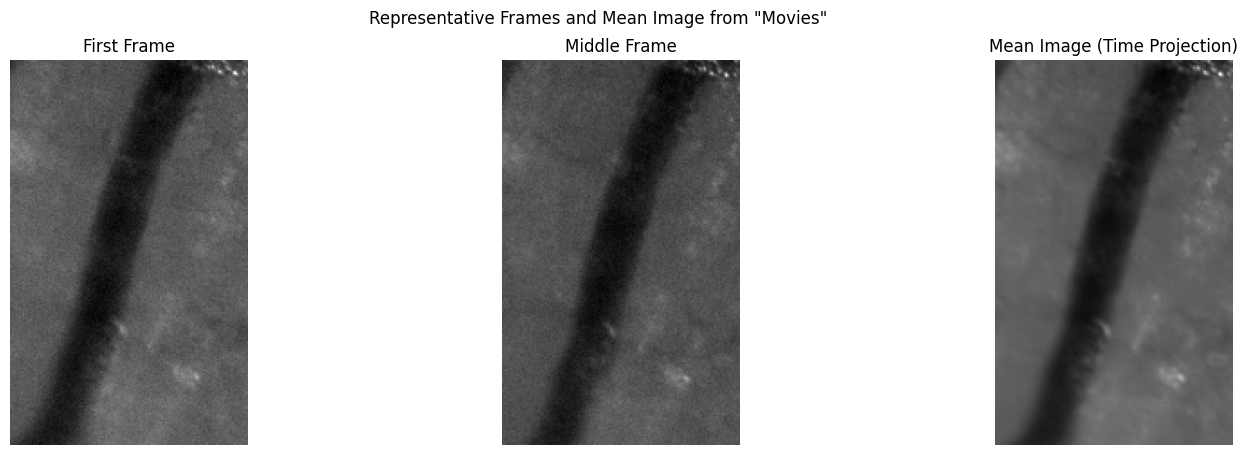

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to safely read a few frames
def get_frame(index):
    return Movies.data[index, :, :]

n_frames = Movies.data.shape[0]
frame0 = get_frame(0)
frame_middle = get_frame(n_frames // 2)

# Compute the mean image across all time points (as a projection)
mean_image = np.zeros_like(frame0, dtype=np.float32)
batch_size = 1000  # Avoid memory issues for large files
for start in range(0, n_frames, batch_size):
    stop = min(n_frames, start + batch_size)
    mean_image += np.sum(Movies.data[start:stop], axis=0)
mean_image = mean_image / n_frames

# Plotting
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(frame0, cmap='gray')
plt.title('First Frame')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(frame_middle, cmap='gray')
plt.title('Middle Frame')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mean_image, cmap='gray')
plt.title('Mean Image (Time Projection)')
plt.axis('off')

plt.suptitle('Representative Frames and Mean Image from "Movies"')
plt.show()

## 6. Examining Vessel Diameter Time Series

To analyze vessel pulsatility, it's useful to visualize how the average intensity (proxy for vessel area) changes over time.

We'll plot the mean pixel intensity across the vessel image for each frame.

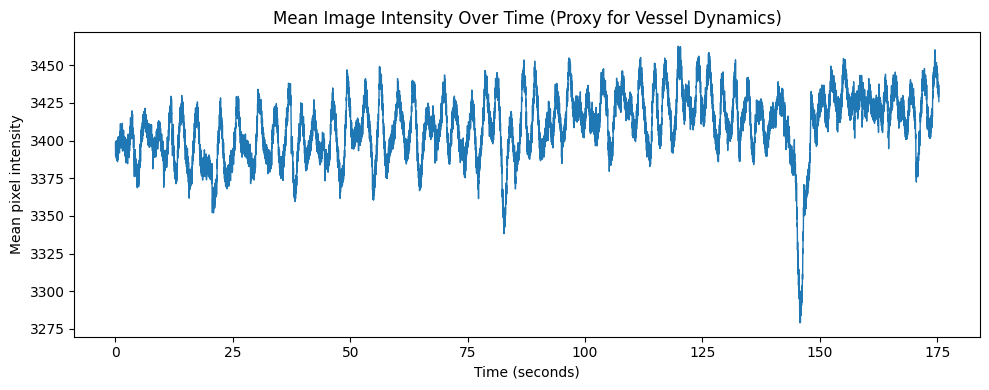

In [6]:
# Compute mean intensity (time series)
mean_intensity = np.zeros(n_frames, dtype=np.float32)
batch_size = 1000
for start in range(0, n_frames, batch_size):
    stop = min(n_frames, start + batch_size)
    mean_intensity[start:stop] = Movies.data[start:stop].mean(axis=(1,2))

# Make time axis
time = np.arange(n_frames) / Movies.rate  # seconds

plt.figure(figsize=(10,4))
plt.plot(time, mean_intensity, lw=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Mean pixel intensity')
plt.title('Mean Image Intensity Over Time (Proxy for Vessel Dynamics)')
plt.tight_layout()
plt.show()

## 7. Summary and Next Steps

- Dandiset 001366 provides high-frame-rate movies of pial vessels in mice for surface vessel diameter and pulsatility quantification.
- File structure is clear and uses industry-standard NWB format.
- Each file contains subject, session, and high-dimensional imaging data.
- Typical first analyses include vessel diameter extraction, pulsation quantification, and statistical time-series analysis.

**Next steps** for researchers:
- Segment vessels in each frame for diameter analysis (using thresholding, Radon transform, etc.).
- Quantify pulsatility metrics or vascular changes across time.
- Compare across animals, ages, or conditions (if available).

For more details and further data, visit [Dandiset 001366 on DANDI Archive](https://dandiarchive.org/dandiset/001366/0.250324.1603).